# Import libraries


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset


In [22]:
df = pd.read_csv('/content/train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# Data Cleaning

In [23]:
# Rename last column (fix typo "2urvived")
df.rename(columns={'2urvived':'Survived'}, inplace=True)

# Check missing values
print(df.isnull().sum())

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
Survived       0
dtype: int64


In [24]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

/tmp/ipython-input-3208325424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3208325424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [25]:
# Check if any of the "zero" columns have useful info
zero_cols = [col for col in df.columns if 'zero' in col.lower()]
print("Zero-like columns:", zero_cols)

# Check unique values in them
for col in zero_cols[:10]:  # first 10 only
    print(col, df[col].unique())

Zero-like columns: ['zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18']
zero [0]
zero.1 [0]
zero.2 [0]
zero.3 [0]
zero.4 [0]
zero.5 [0]
zero.6 [0]
zero.7 [0]
zero.8 [0]
zero.9 [0]


In [26]:
df.drop(columns=zero_cols, inplace=True)

In [27]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


# Visualizations

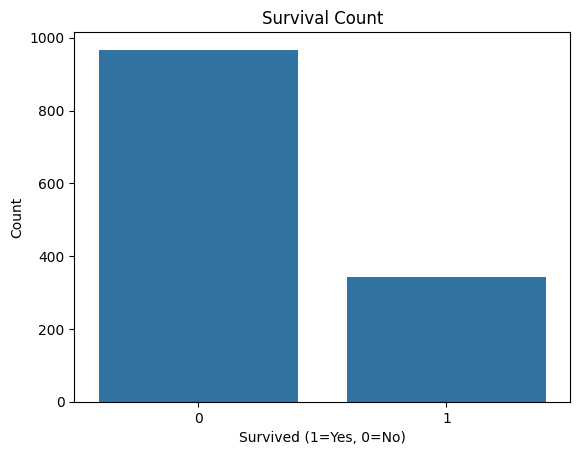

In [28]:
# --- Bar chart for Survived ---
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

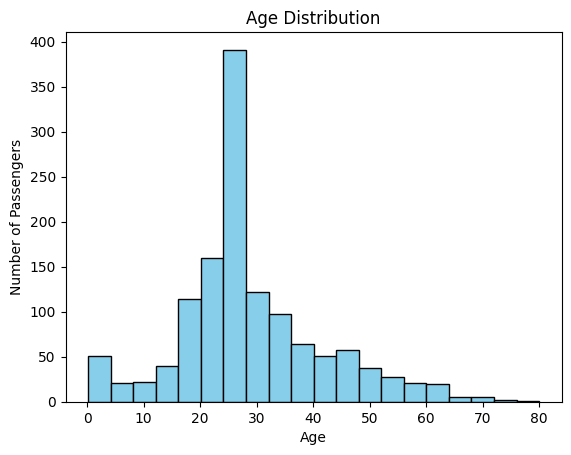

In [29]:
# --- Histogram for Age ---
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

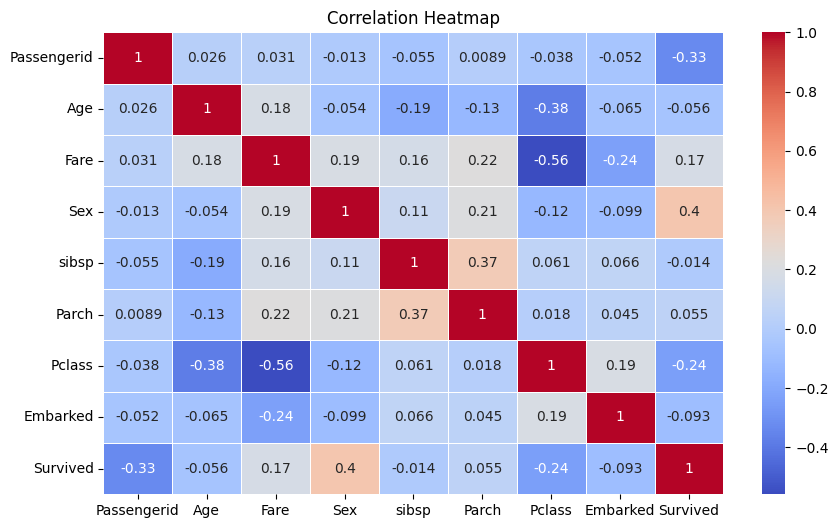

In [30]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Key Observations

In [31]:
print("1. Most passengers are in the 20–40 age range.")
print("2. The majority of passengers did not survive (Survived=0).")
print("3. Higher fares seem associated with higher survival chances.")
print("4. Most passengers travelled in 3rd class.")


1. Most passengers are in the 20–40 age range.
2. The majority of passengers did not survive (Survived=0).
3. Higher fares seem associated with higher survival chances.
4. Most passengers travelled in 3rd class.
